# Spotify Music Recommendation System
Clustering - Spotify Music Recommendation System Problem Statement : Apply various techniques to generate a recommendation system that discovers the songs and number of recommendations that suits our interest based on genre.

Dataset Link : https://drive.google.com/drive/folders/1I5L56Amq-DXK0dj48v6ZVlEPEojbxSYB?usp=share_link

In [95]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [96]:
#Data
df=pd.read_csv('dataset.csv')
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [98]:
# Dropping Unnamed track_id, explicit, mode, time_signature, duration_ms
df.drop(['Unnamed: 0', 'track_id', 'explicit', 'mode', 'time_signature', 'duration_ms'], axis=1, inplace=True)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   danceability      114000 non-null  float64
 5   energy            114000 non-null  float64
 6   key               114000 non-null  int64  
 7   loudness          114000 non-null  float64
 8   speechiness       114000 non-null  float64
 9   acousticness      114000 non-null  float64
 10  instrumentalness  114000 non-null  float64
 11  liveness          114000 non-null  float64
 12  valence           114000 non-null  float64
 13  tempo             114000 non-null  float64
 14  track_genre       114000 non-null  object 
dtypes: float64(9), int64(2), object(4)
memory usage: 13.0+ MB


In [100]:
df.isnull().sum()

artists             1
album_name          1
track_name          1
popularity          0
danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
track_genre         0
dtype: int64

In [101]:
# Dropping Null Values
df.dropna(inplace=True)

In [102]:
# Dropping Duplicate Row
dup= df.duplicated().sum()
print(dup)
df.drop_duplicates(inplace=True)

577


In [10]:
df.isnull().sum()


artists             0
album_name          0
track_name          0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
track_genre         0
dtype: int64

In [103]:
# Checking Cardinality
df.nunique().sort_index()

acousticness         5061
album_name          46589
artists             31437
danceability         1174
energy               2083
instrumentalness     5346
key                    12
liveness             1722
loudness            19480
popularity            101
speechiness          1489
tempo               45652
track_genre           114
track_name          73608
valence              1790
dtype: int64

In [13]:
# Understanding Track's Audio Features

Acousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. - 1.0 represents high confidence the track is acoustic. danceability - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. - A value of 0.0 is least danceable and 1.0 is most danceable. duration_ms - The duration of the track in milliseconds. energy - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. - Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. - Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. instrumentalness - Predicts whether a track contains no vocals. - "Ooh" and "aah" sounds are treated as instrumental in this context. - Rap or spoken word tracks are clearly "vocal". - The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. - Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. key - The key the track is in. Integers map to pitches using standard Pitch Class notation. - E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. - If no key was detected, the value is -1. - Range: -1 - 11 liveness - Detects the presence of an audience in the recording. - Higher liveness values represent an increased probability that the track was performed live. - A value above 0.8 provides strong likelihood that the track is live. loudness - The overall loudness of a track in decibels (dB). - Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. - Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). - Values typically range between -60 and 0 db. mode - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. - Major is represented by 1 and minor is 0. speechiness - Speechiness detects the presence of spoken words in a track. - The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. - Values above 0.66 describe tracks that are probably made entirely of spoken words. - Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. - - Values below 0.33 most likely represent music and other non-speech-like tracks. tempo - The overall estimated tempo of a track in beats per minute (BPM). - In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. time_signature - An estimated time signature. - The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). - The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4". valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. - Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). explicit - Explicit content on Spotify refers to adult content, which may include offensive or curse Source: https://developer.spotify.com/documentation/web-api/reference/get-audio-features

In [14]:
# Descriptive Statistics of Numerical Columns
df.describe()

,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000,113422.000000
mean,33.359674,0.567113,0.642174,5.309332,-8.242913,0.084697,0.314075,0.155802,0.213610,0.474239,122.176181
std,22.269626,0.173402,0.251031,3.559767,5.011931,0.105803,0.331943,0.309314,0.190481,0.259239,29.972104
min,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.456000,0.473000,2.000000,-9.998000,0.035900,0.016800,0.000000,0.098000,0.260000,99.299000
50%,35.000000,0.580000,0.685000,5.000000,-6.996000,0.048900,0.168000,0.000041,0.132000,0.464000,122.019000
75%,50.000000,0.695000,0.854000,8.000000,-5.001000,0.084575,0.596000,0.048700,0.273000,0.683000,140.073000
max,100.000000,0.985000,1.000000,11.000000,4.532000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000


In [18]:
# Desriptive Statistics of Categorical
df.describe(include=["O"])

,artists,album_name,track_name,track_genre
count,113422,113422,113422,113422
unique,31437,46589,73608,114
top,The Beatles,Feliz Cumpleaños con Perreo,Run Rudolph Run,acoustic
freq,279,180,151,1000


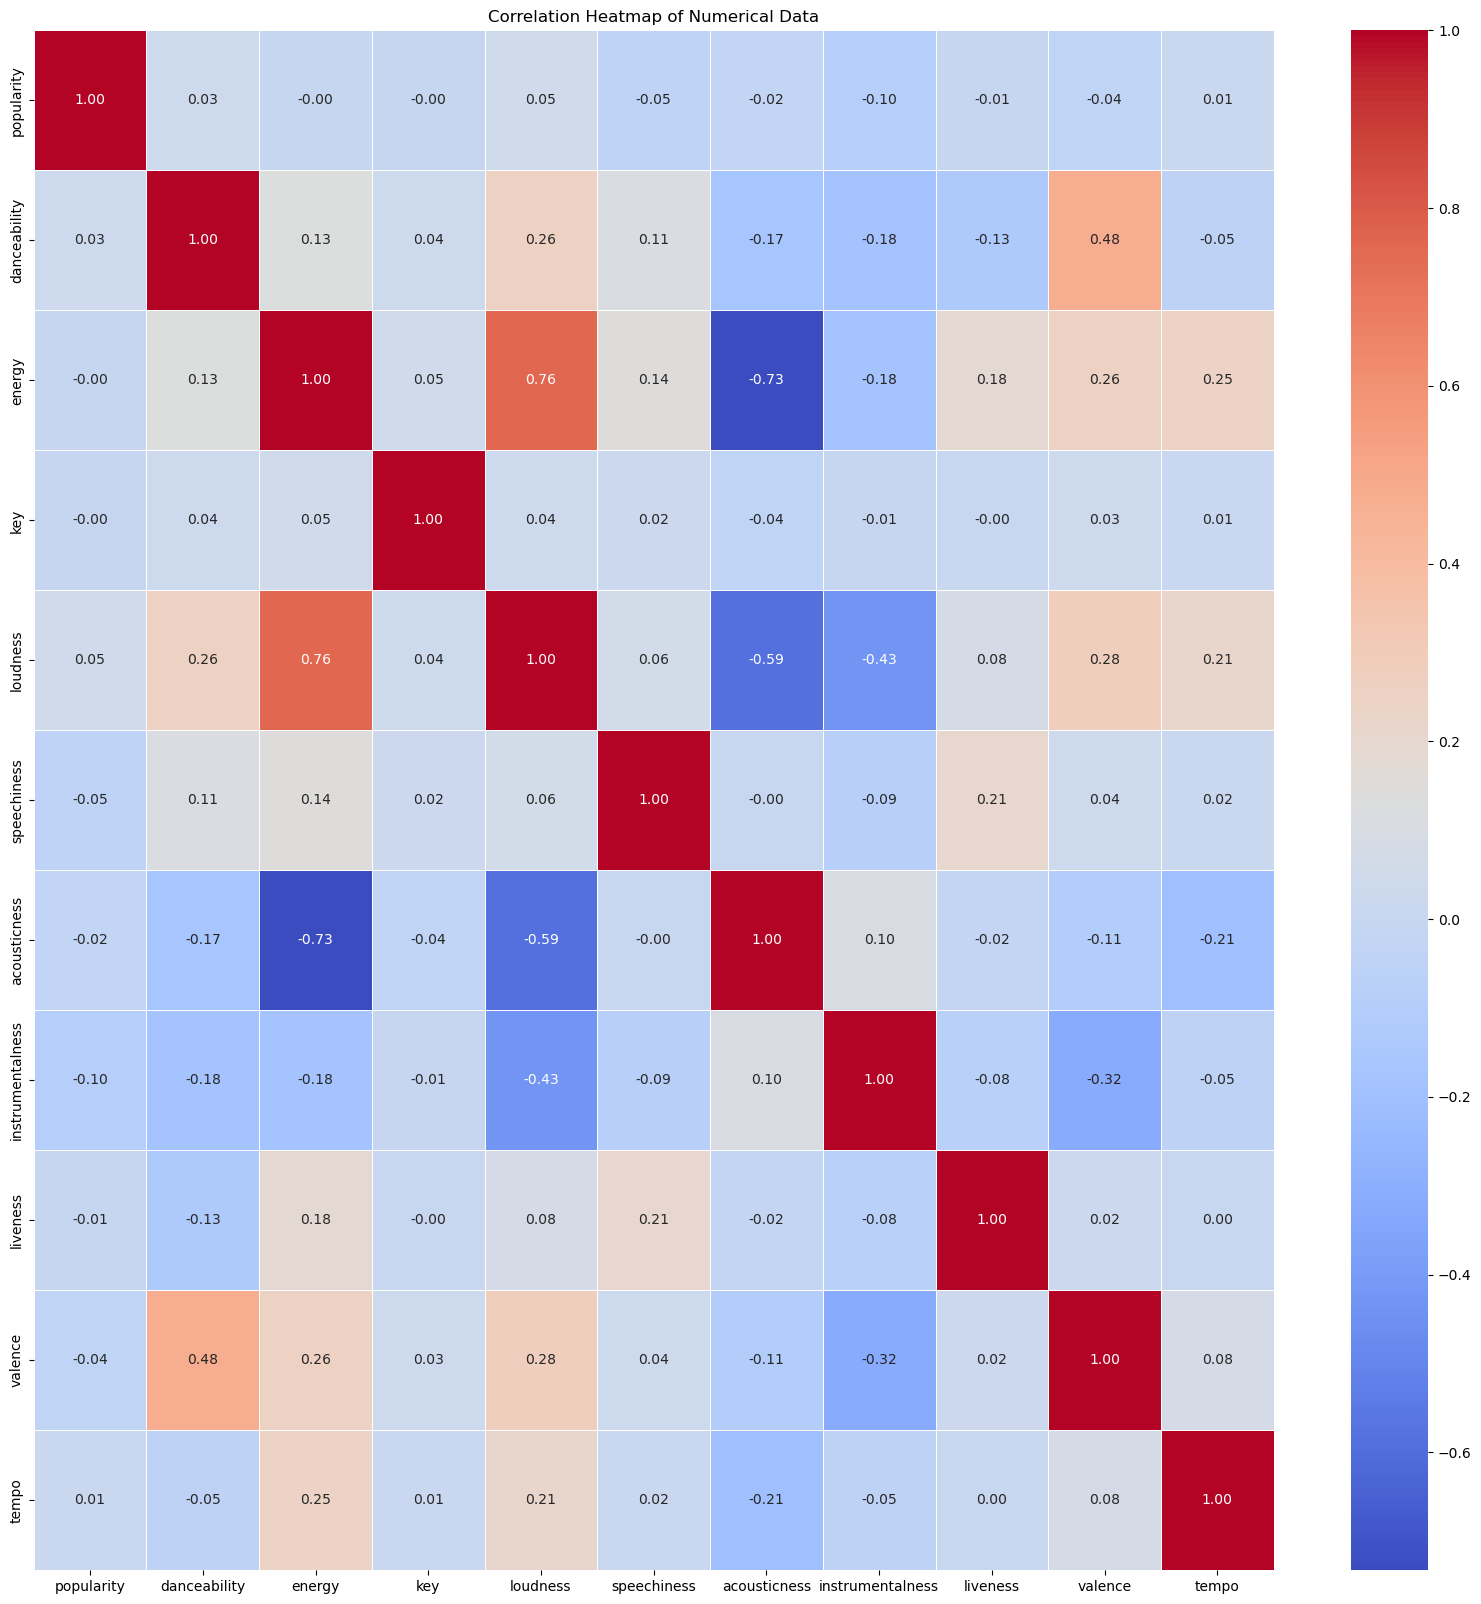

In [56]:
# Correlation between numerical columns
#plt.figure(figsize=(20,20))
#sns.heatmap(df_clean.corr(), annot=True, fmt='.2g', cmap='rocket_r')
#plt.show()


plt.figure(figsize=(20, 20)) # Adjust figure size as needed
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Data')
plt.show()

In [ ]:
# Feature Engineering


In [57]:
from sklearn.preprocessing import StandardScaler

In [59]:
df_new=df.copy(deep= True)
# List of columns to be Standardised
cols_to_standardise=[]
for col in df_new.select_dtypes(include=[int, float]).columns:
    cols_to_standardise.append(col)
cols_to_standardise

['popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [60]:
#Scaling
scaler= StandardScaler()
df_new[cols_to_standardise] = scaler.fit_transform(df_new[cols_to_standardise])


In [61]:
df_new

,artists,album_name,track_name,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,Gen Hoshino,Comedy,Comedy,1.780025,0.627949,-0.721723,-1.210571,0.298671,0.551056,-0.849169,-0.503701,0.758030,0.928727,-1.143041,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.971746,-0.848393,-1.896881,-1.210571,-1.794144,-0.079366,1.837447,-0.503686,-0.591193,-0.799417,-1.490966,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,1.061555,-0.744588,-1.128049,-1.491490,-0.297509,-0.274069,-0.313533,-0.503704,-0.507195,-1.366465,-1.529568,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,1.690217,-1.736505,-2.320735,-1.491490,-2.049536,-0.457431,1.780208,-0.503475,-0.428446,-1.277743,1.987317,acoustic
4,Chord Overstreet,Hold On,Hold On,2.184165,0.293465,-0.793428,-0.929652,-0.286934,-0.303369,0.466725,-0.503704,-0.686216,-1.185164,-0.074309,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,-0.555004,-2.278600,-1.622014,-0.086897,-1.626144,-0.401666,0.981875,2.496500,-0.668366,-1.698592,0.127413,world-music
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,-0.510099,-2.267066,-2.092077,-1.491490,-2.010229,-0.421514,2.048327,2.651683,-0.570193,-1.694349,-1.232391,world-music
113997,Cesária Evora,Best Of,Miss Perfumado,-0.510099,0.356902,-1.247557,-1.491490,-0.529157,-0.403556,1.665730,-0.503704,-0.680966,1.036736,0.340379,world-music
113998,Michael W. Smith,Change Your World,Friends,0.343084,0.114689,-0.542462,0.474940,-0.527960,-0.519811,0.201618,-0.503704,0.296039,-0.236227,0.459890,world-music


In [62]:
df

,artists,album_name,track_name,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,Gen Hoshino,Comedy,Comedy,73,0.676,0.4610,1,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,0.420,0.1660,1,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,0.438,0.3590,0,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,0.266,0.0596,0,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,acoustic
4,Chord Overstreet,Hold On,Hold On,82,0.618,0.4430,2,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,0.172,0.2350,5,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,world-music
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,0.174,0.1170,0,-18.318,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,world-music
113997,Cesária Evora,Best Of,Miss Perfumado,22,0.629,0.3290,0,-10.895,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,world-music
113998,Michael W. Smith,Change Your World,Friends,41,0.587,0.5060,7,-10.889,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,world-music


In [63]:
# Picking only the numerical columns to make clustering 
X= df_new[cols_to_standardise]

In [64]:
X

,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1.780025,0.627949,-0.721723,-1.210571,0.298671,0.551056,-0.849169,-0.503701,0.758030,0.928727,-1.143041
1,0.971746,-0.848393,-1.896881,-1.210571,-1.794144,-0.079366,1.837447,-0.503686,-0.591193,-0.799417,-1.490966
2,1.061555,-0.744588,-1.128049,-1.491490,-0.297509,-0.274069,-0.313533,-0.503704,-0.507195,-1.366465,-1.529568
3,1.690217,-1.736505,-2.320735,-1.491490,-2.049536,-0.457431,1.780208,-0.503475,-0.428446,-1.277743,1.987317
4,2.184165,0.293465,-0.793428,-0.929652,-0.286934,-0.303369,0.466725,-0.503704,-0.686216,-1.185164,-0.074309
...,...,...,...,...,...,...,...,...,...,...,...
113995,-0.555004,-2.278600,-1.622014,-0.086897,-1.626144,-0.401666,0.981875,2.496500,-0.668366,-1.698592,0.127413
113996,-0.510099,-2.267066,-2.092077,-1.491490,-2.010229,-0.421514,2.048327,2.651683,-0.570193,-1.694349,-1.232391
113997,-0.510099,0.356902,-1.247557,-1.491490,-0.529157,-0.403556,1.665730,-0.503704,-0.680966,1.036736,0.340379
113998,0.343084,0.114689,-0.542462,0.474940,-0.527960,-0.519811,0.201618,-0.503704,0.296039,-0.236227,0.459890


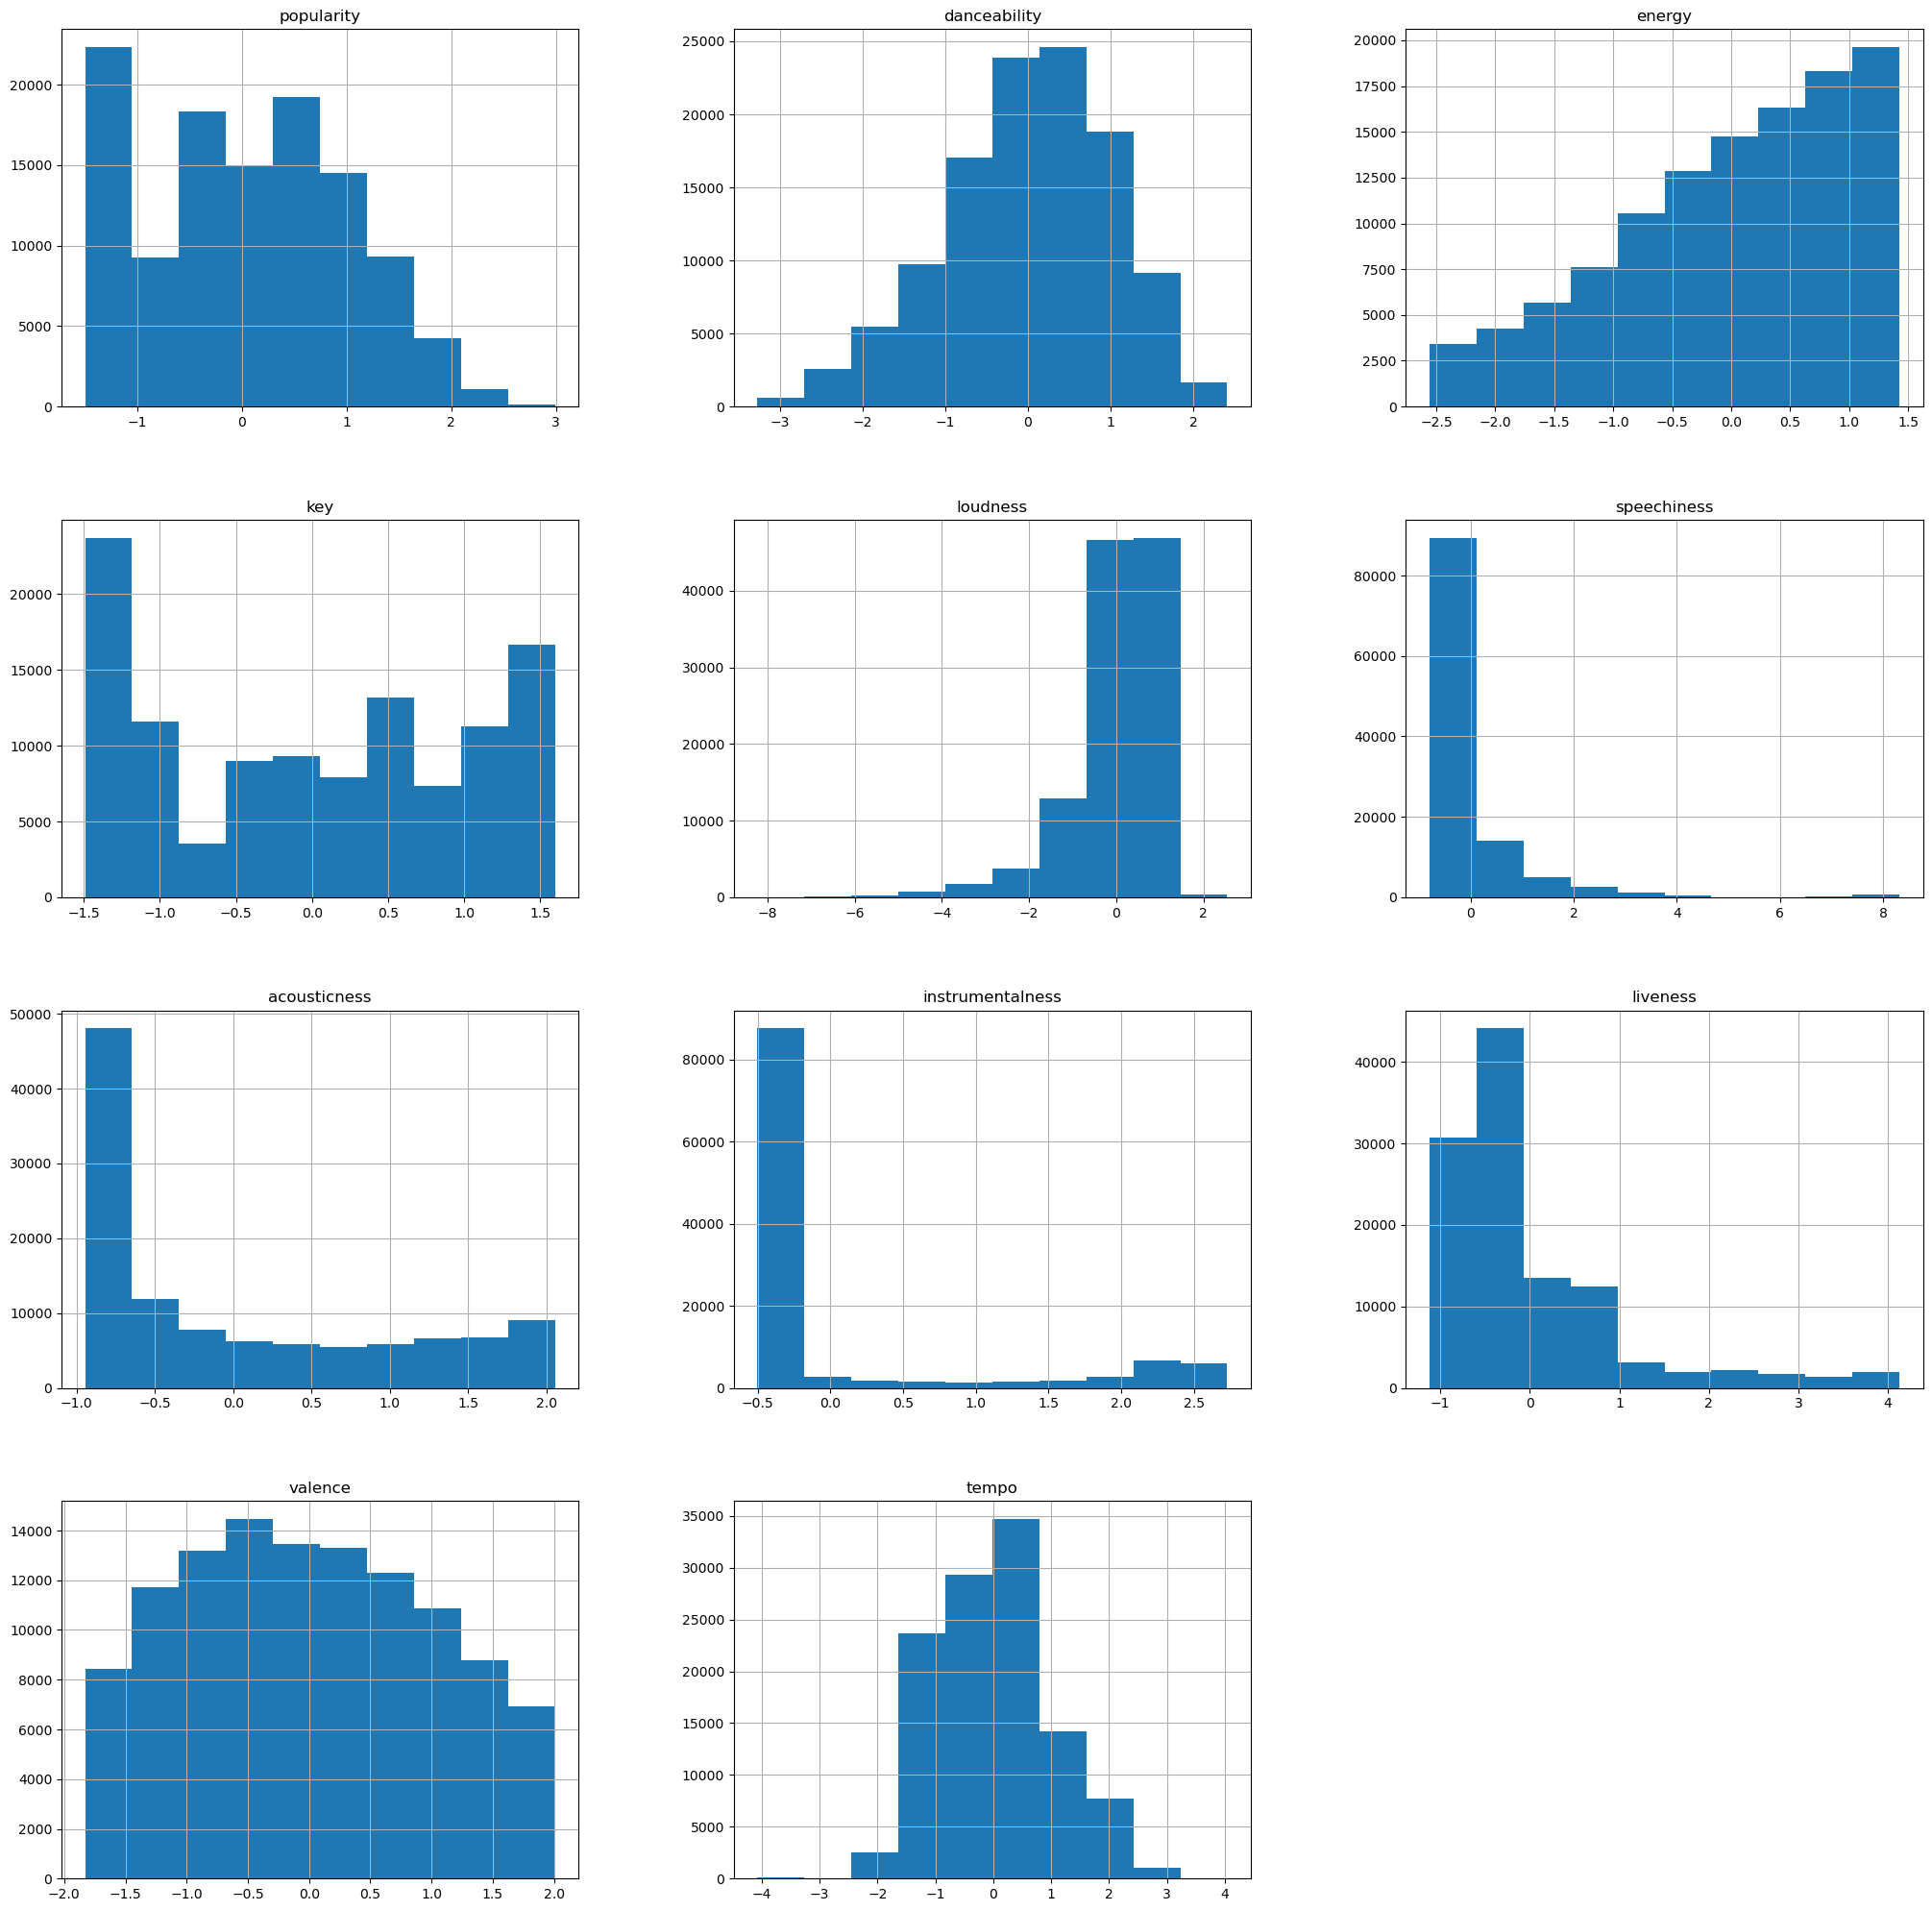

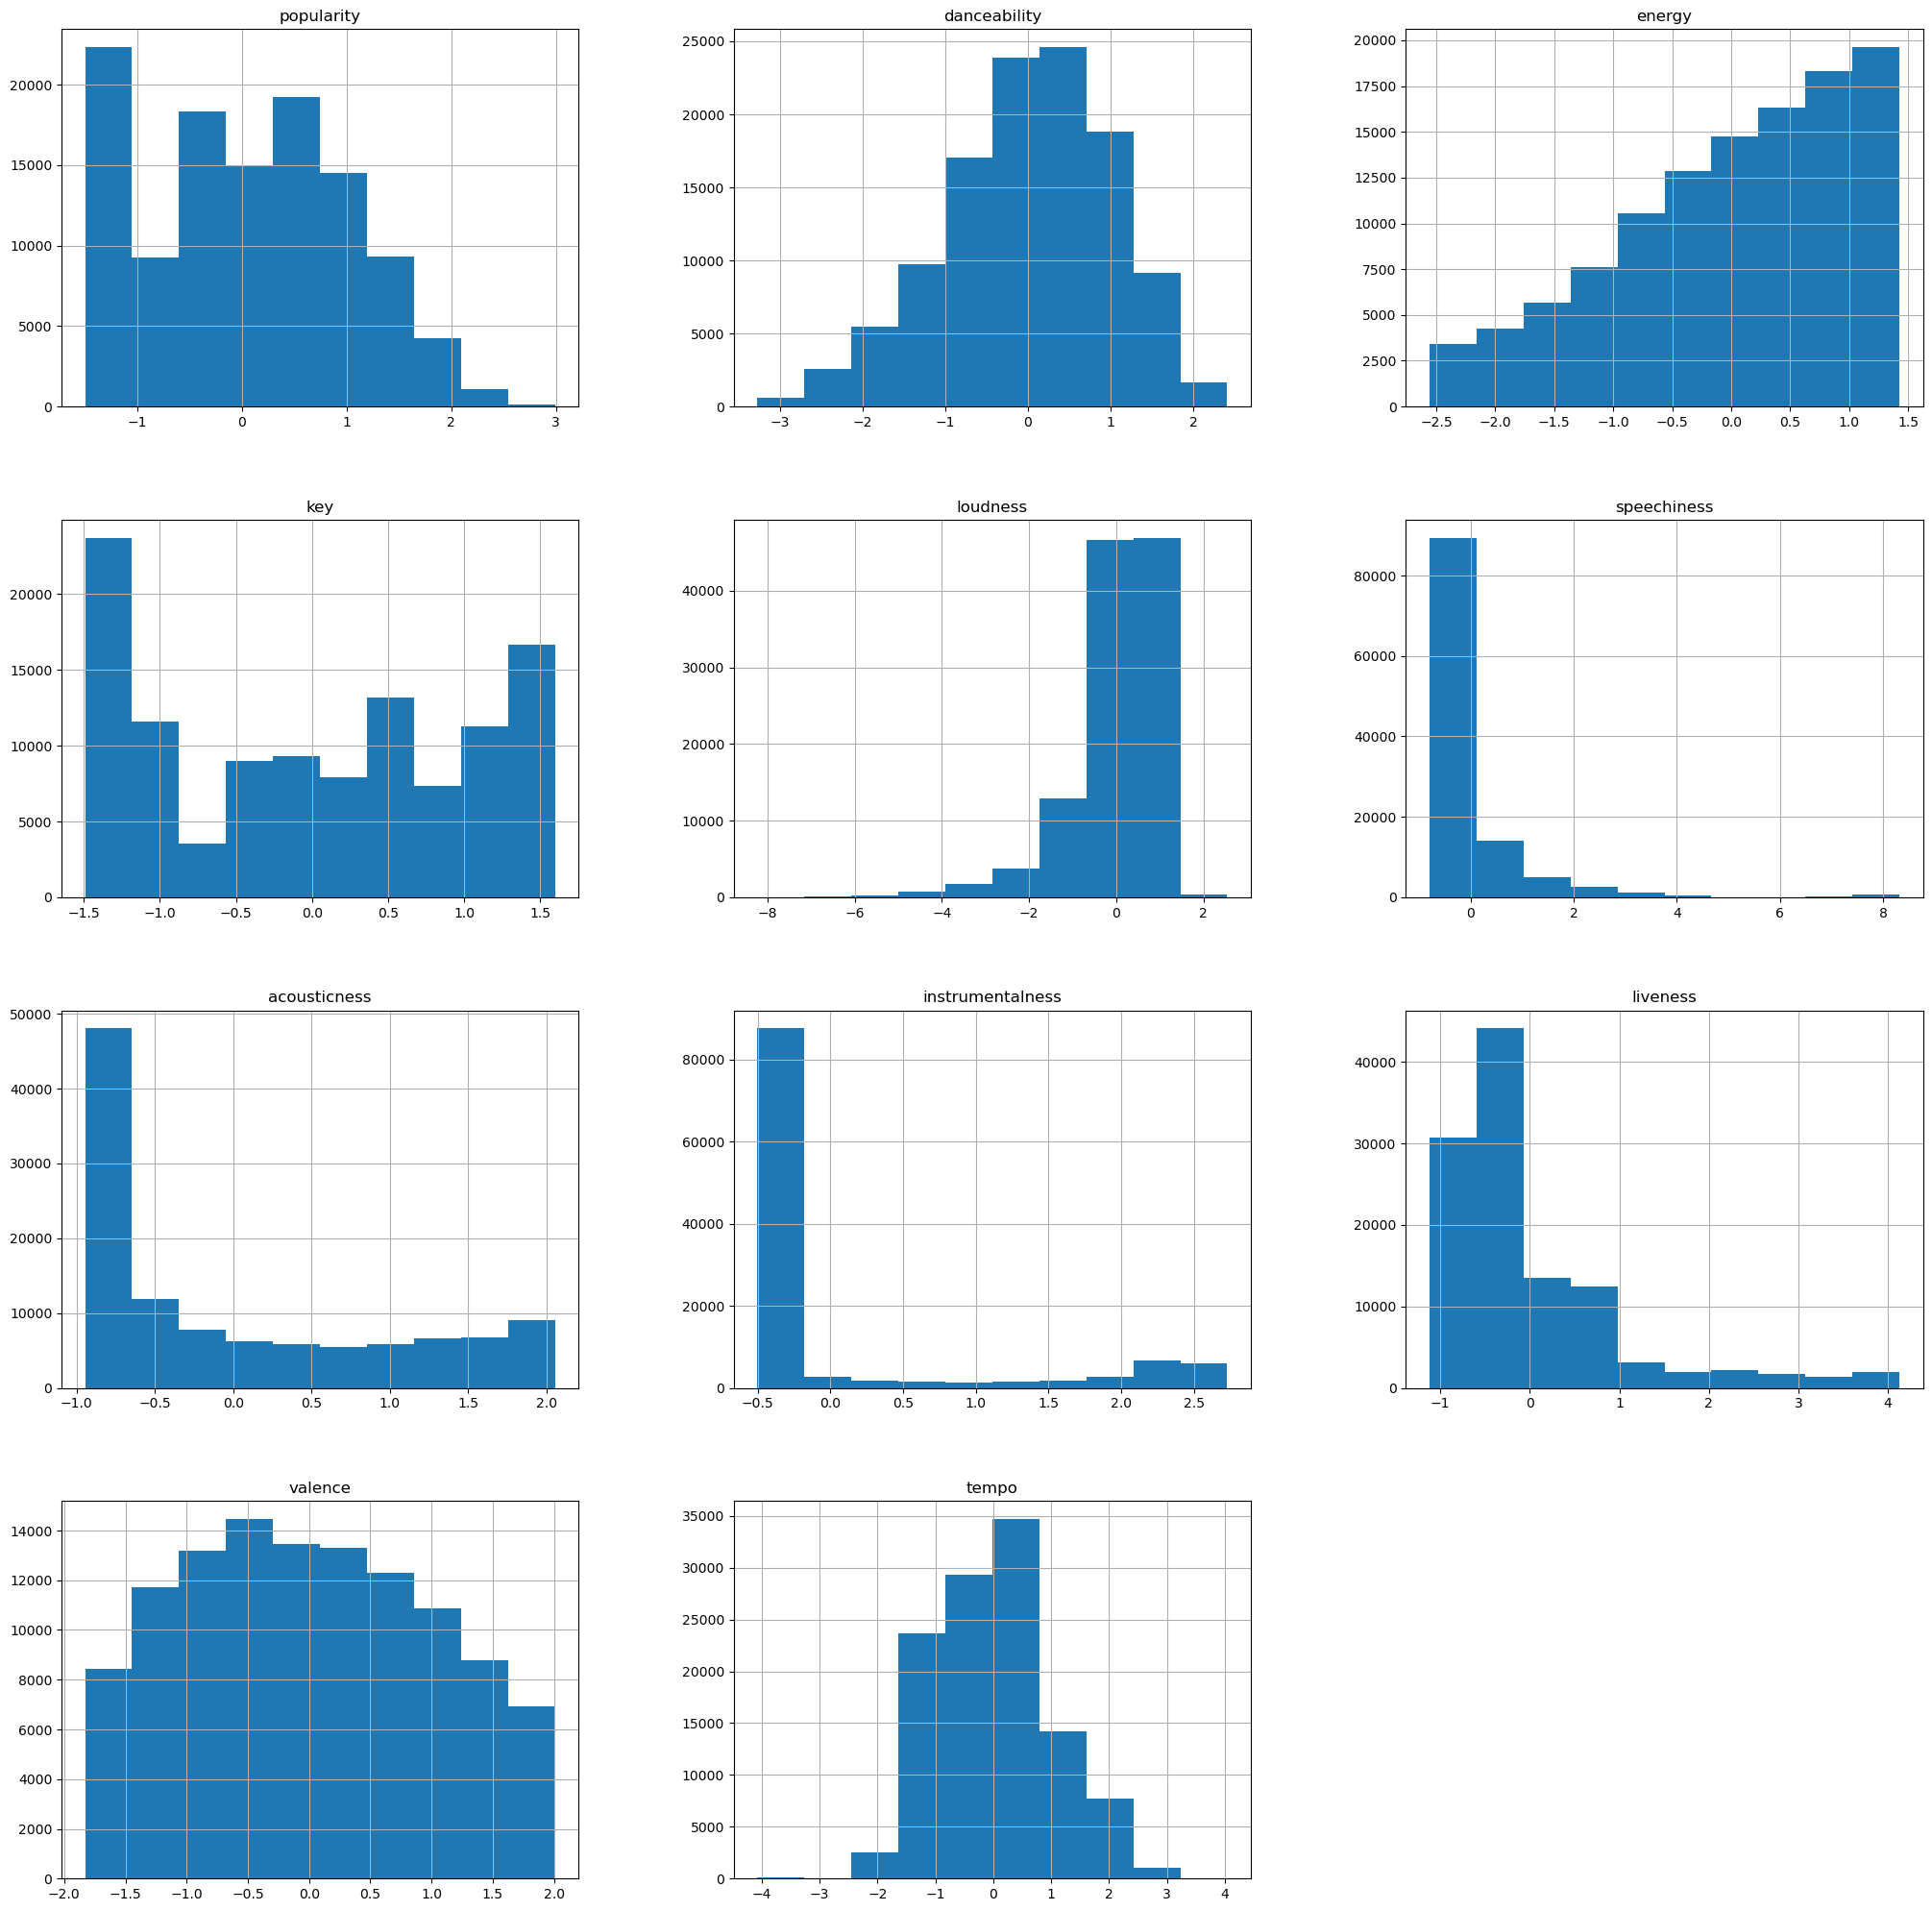

In [66]:
X.hist(figsize=(25,25))
plt.show()

In [68]:
wcss=[]
for i in range(1,21):
    print(i)
    kmeans=KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
print(wcss)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
[1247641.9999999972, 1028842.4601155292, 938849.3339199529, 869883.7378817275, 819842.0417083662, 757497.91944743, 707287.0040990474, 691405.4137357537, 677759.7250210651, 628744.5146880886, 615679.9529306521, 603133.4906759462, 583011.3780543648, 570819.5236305916, 551657.8535619135, 539752.6706530643, 527825.8722286478, 519030.15756885073, 512822.1298162957, 504994.064939408]


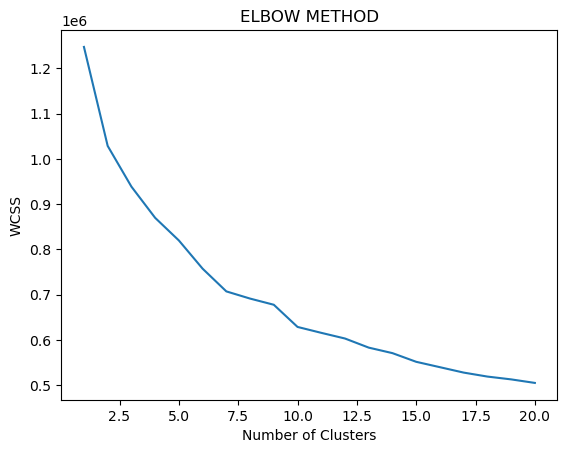

In [69]:
plt.plot(range(1,21), wcss)
plt.title("ELBOW METHOD")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [106]:
selected_clusters=8
clusters= KMeans(selected_clusters, random_state=42)
#pred_y =clusters_new.fit(df_analysis) #old
pred_y=clusters.fit_predict(X) # newline

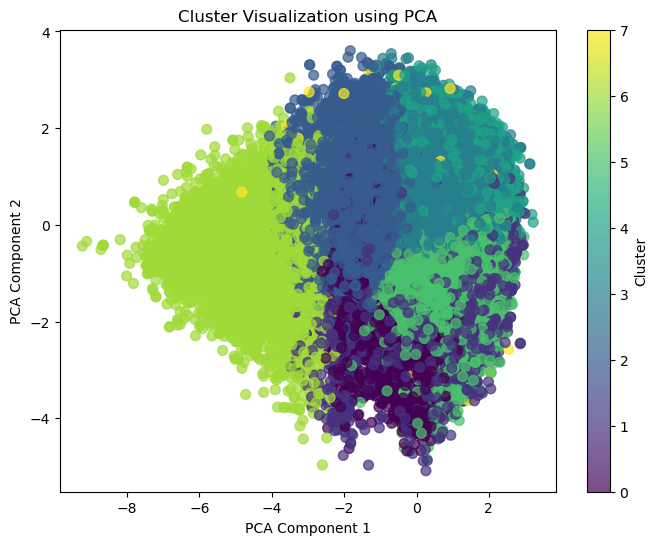

In [107]:
from sklearn.decomposition import PCA

# Apply PCA to reduce data to 2 dimensions for visualization
pca= PCA(n_components=2)
reduced_data= pca.fit_transform(X) 


#Create a scatter plot to visualize the clusters
plt.figure(figsize=(8,6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=pred_y, cmap='viridis', s=50, alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization using PCA')
plt.colorbar(label='Cluster')
plt.show()

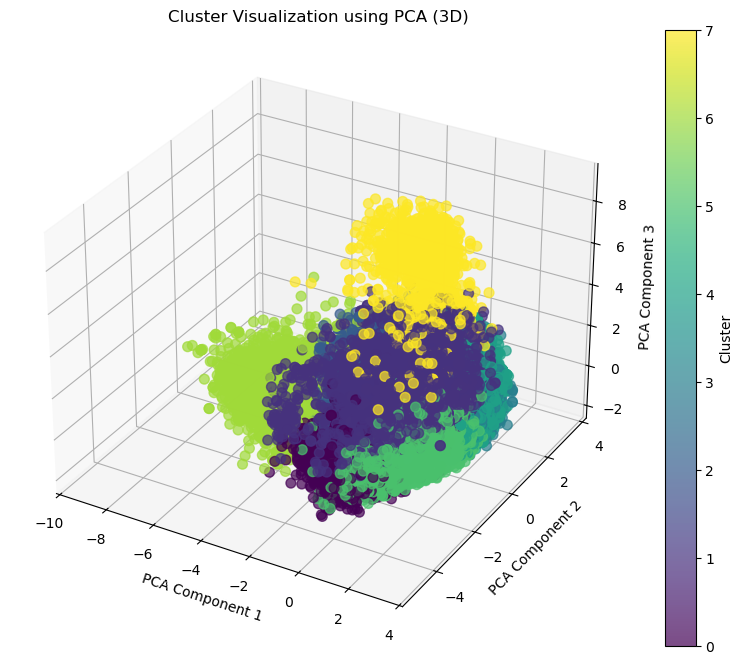

In [108]:
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

# Apply PCA to reduce data to 3 dimensions for visualization
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(X)

# Create a 3D scatter plot to visualize the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with the reduced data
scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=pred_y, cmap='viridis', s=50, alpha=0.7)

# Label axes
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Title
ax.set_title('Cluster Visualization using PCA (3D)')

# Add a color bar
colorbar = plt.colorbar(scatter)
colorbar.set_label('Cluster')

plt.show()

In [83]:
for i in np.unique(clusters.labels_):
    print(i)

0
1
2
3
4
5
6
7


In [109]:
# Creating a new copy of dataframe and adding the cluster labels
df_std_clustered=df_new.copy(deep=True)
df_std_clustered['Cluster']=clusters.labels_
df_std_clustered

,artists,album_name,track_name,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,Cluster
0,Gen Hoshino,Comedy,Comedy,1.780025,0.627949,-0.721723,-1.210571,0.298671,0.551056,-0.849169,-0.503701,0.758030,0.928727,-1.143041,acoustic,3
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.971746,-0.848393,-1.896881,-1.210571,-1.794144,-0.079366,1.837447,-0.503686,-0.591193,-0.799417,-1.490966,acoustic,2
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,1.061555,-0.744588,-1.128049,-1.491490,-0.297509,-0.274069,-0.313533,-0.503704,-0.507195,-1.366465,-1.529568,acoustic,2
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,1.690217,-1.736505,-2.320735,-1.491490,-2.049536,-0.457431,1.780208,-0.503475,-0.428446,-1.277743,1.987317,acoustic,2
4,Chord Overstreet,Hold On,Hold On,2.184165,0.293465,-0.793428,-0.929652,-0.286934,-0.303369,0.466725,-0.503704,-0.686216,-1.185164,-0.074309,acoustic,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,-0.555004,-2.278600,-1.622014,-0.086897,-1.626144,-0.401666,0.981875,2.496500,-0.668366,-1.698592,0.127413,world-music,6
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,-0.510099,-2.267066,-2.092077,-1.491490,-2.010229,-0.421514,2.048327,2.651683,-0.570193,-1.694349,-1.232391,world-music,6
113997,Cesária Evora,Best Of,Miss Perfumado,-0.510099,0.356902,-1.247557,-1.491490,-0.529157,-0.403556,1.665730,-0.503704,-0.680966,1.036736,0.340379,world-music,2
113998,Michael W. Smith,Change Your World,Friends,0.343084,0.114689,-0.542462,0.474940,-0.527960,-0.519811,0.201618,-0.503704,0.296039,-0.236227,0.459890,world-music,2


In [110]:
# Creating a new copy of dataframe and adding the cluster labels
df_raw_clustered=df.copy(deep=True)
df_raw_clustered['Cluster']=clusters.labels_
df_raw_clustered

,artists,album_name,track_name,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,Cluster
0,Gen Hoshino,Comedy,Comedy,73,0.676,0.4610,1,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,acoustic,3
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,0.420,0.1660,1,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,acoustic,2
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,0.438,0.3590,0,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,acoustic,2
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,0.266,0.0596,0,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,acoustic,2
4,Chord Overstreet,Hold On,Hold On,82,0.618,0.4430,2,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,acoustic,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,0.172,0.2350,5,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,world-music,6
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,0.174,0.1170,0,-18.318,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,world-music,6
113997,Cesária Evora,Best Of,Miss Perfumado,22,0.629,0.3290,0,-10.895,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,world-music,2
113998,Michael W. Smith,Change Your World,Friends,41,0.587,0.5060,7,-10.889,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,world-music,2


In [86]:
# Cluster Analysis


In [111]:
# Popularity mean by cluster
df_raw_clustered.groupby(['Cluster']).popularity.mean()

Cluster
0    27.934162
1    36.226558
2    32.945916
3    55.623824
4    11.725991
5    35.086662
6    28.642847
7    25.251117
Name: popularity, dtype: float64

In [112]:
df_raw_clustered['Cluster'].value_counts()

Cluster
3    24026
4    22065
5    20228
2    20117
0    11422
1     7252
6     7193
7     1119
Name: count, dtype: int64

In [114]:
df_raw_clustered[df_raw_clustered['Cluster']==3].describe()

,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Cluster
count,24026.000000,24026.000000,24026.000000,24026.000000,24026.000000,24026.000000,24026.000000,24026.000000,24026.000000,24026.000000,24026.000000,24026.0
mean,55.623824,0.671383,0.693947,5.434987,-6.573582,0.084226,0.214516,0.018592,0.163749,0.587628,114.891054,3.0
std,13.248132,0.115694,0.151728,3.572685,2.498661,0.083656,0.211173,0.073699,0.101921,0.215970,23.634294,0.0
min,24.000000,0.261000,0.146000,0.000000,-20.343000,0.022100,0.000003,0.000000,0.011400,0.030100,48.578000,3.0
25%,44.000000,0.592000,0.583000,2.000000,-8.020000,0.035725,0.032800,0.000000,0.092200,0.428000,96.056000,3.0
50%,55.000000,0.674000,0.701000,6.000000,-6.260500,0.049900,0.143000,0.000003,0.124000,0.594000,114.595000,3.0
75%,65.000000,0.752000,0.814000,9.000000,-4.820000,0.089200,0.349000,0.000383,0.215000,0.759000,129.079750,3.0
max,100.000000,0.980000,0.998000,11.000000,1.821000,0.565000,0.975000,0.941000,0.624000,0.994000,208.038000,3.0


In [115]:
cluster_info=[]
for i in range(0, selected_clusters):
    cluster_info.append(df_raw_clustered[df_raw_clustered['Cluster']==i].describe().iloc[1,:])
    print(cluster_info[i].sort_values())
    print()

loudness             -8.447090
Cluster               0.000000
speechiness           0.071195
acousticness          0.112872
liveness              0.169666
valence               0.338212
danceability          0.587301
energy                0.740199
instrumentalness      0.794810
key                   5.545964
popularity           27.934162
tempo               126.462147
Name: mean, dtype: float64

loudness             -7.064282
instrumentalness      0.067257
speechiness           0.086514
acousticness          0.292882
valence               0.511415
danceability          0.521824
liveness              0.752105
energy                0.752548
Cluster               1.000000
key                   5.343905
popularity           36.226558
tempo               123.338059
Name: mean, dtype: float64

loudness            -10.950343
instrumentalness      0.031128
speechiness           0.051680
liveness              0.158997
energy                0.358666
valence               0.383804
danceability  

In [117]:
# Creating a mean summary dictionary and classify it
cluster_info_dict={}
for col, val in enumerate(cluster_info):
    cluster_info_dict[f'Cluster{col}']=val.to_dict()
cluster_info_dict


{'Cluster0': {'popularity': 27.93416214323236,
  'danceability': 0.587301199439678,
  'energy': 0.7401993871476098,
  'key': 5.545963929259324,
  'loudness': -8.447089914200665,
  'speechiness': 0.07119507967081072,
  'acousticness': 0.11287155185781825,
  'instrumentalness': 0.7948098406583785,
  'liveness': 0.16966638066888462,
  'valence': 0.33821153563298895,
  'tempo': 126.46214655927159,
  'Cluster': 0.0},
 'Cluster1': {'popularity': 36.2265581908439,
  'danceability': 0.5218242277992278,
  'energy': 0.7525479813706564,
  'key': 5.343905129619415,
  'loudness': -7.064282129067843,
  'speechiness': 0.08651439602868173,
  'acousticness': 0.2928821858742416,
  'instrumentalness': 0.06725661050330943,
  'liveness': 0.7521049365692222,
  'valence': 0.5114145118587976,
  'tempo': 123.3380586045229,
  'Cluster': 1.0},
 'Cluster2': {'popularity': 32.945916389123624,
  'danceability': 0.5185974002087785,
  'energy': 0.35866554564795944,
  'key': 4.959288164239201,
  'loudness': -10.950343

In [118]:
# Catagorising the dictionary

In [119]:
totalcluster= len(cluster_info_dict)

In [120]:
totalcluster

8

In [122]:
Categorised = []
for i in range(totalcluster):
    temp = cluster_info_dict[f'Cluster{i}']
    try:
        if temp['danceability'] >= 0.5:
            temp['danceability'] = "Most Danceable"
        else:
            temp['danceability'] = "Least Danceable"

        if temp['energy'] >= 0.5:
            temp['energy'] = "Energetic"
        else:
            temp['energy'] = "Non Energetic"

        if temp['loudness'] >= -60 and temp['loudness'] < -40:
            temp['loudness'] = "Quite"
        elif temp['loudness'] >= -40 and temp['loudness'] < -20:
            temp['loudness'] = "Mild"
        else:
            temp['loudness'] = "Loud"

        if temp['speechiness'] > 0.66:
            temp['speechiness'] = "Spoken Words"
        elif temp['speechiness'] >= 0.33 and temp['speechiness'] <= 0.66:  
            temp['speechiness'] = "Music and Speech"
        else:
            temp['speechiness'] = "Music"

        if temp['acousticness'] >= 0.5:
            temp['acousticness'] = "Mostly Acoustic"
        else:
            temp['acousticness'] = "Non Acoustic"

        if temp['instrumentalness'] >= 0.5:
            temp['instrumentalness'] = "Instrumental"
        else:
            temp['instrumentalness'] = "Vocal"

        if temp['liveness'] >= 0.8:
            temp['liveness'] = "Live Track"
        else:
            temp['liveness'] = "Studio Recorded"

        if temp['valence'] >= 0.5:
            temp['valence'] = "Happy, Cheerful, Euphoric"
        else:
            temp['valence'] = "Sad, Depressed, Angry"

        if temp['tempo'] >= 0.5:
            temp['tempo'] = "Speed"
        else:
            temp['tempo'] = "Slow Pace"
        Categorised.append(temp)
    except:
        pass

In [123]:
Categorised

[{'popularity': 27.93416214323236,
  'danceability': 'Most Danceable',
  'energy': 'Energetic',
  'key': 5.545963929259324,
  'loudness': 'Loud',
  'speechiness': 'Music',
  'acousticness': 'Non Acoustic',
  'instrumentalness': 'Instrumental',
  'liveness': 'Studio Recorded',
  'valence': 'Sad, Depressed, Angry',
  'tempo': 'Speed',
  'Cluster': 0.0},
 {'popularity': 36.2265581908439,
  'danceability': 'Most Danceable',
  'energy': 'Energetic',
  'key': 5.343905129619415,
  'loudness': 'Loud',
  'speechiness': 'Music',
  'acousticness': 'Non Acoustic',
  'instrumentalness': 'Vocal',
  'liveness': 'Studio Recorded',
  'valence': 'Happy, Cheerful, Euphoric',
  'tempo': 'Speed',
  'Cluster': 1.0},
 {'popularity': 32.945916389123624,
  'danceability': 'Most Danceable',
  'energy': 'Non Energetic',
  'key': 4.959288164239201,
  'loudness': 'Loud',
  'speechiness': 'Music',
  'acousticness': 'Mostly Acoustic',
  'instrumentalness': 'Vocal',
  'liveness': 'Studio Recorded',
  'valence': 'Sad,

In [124]:
# Making Recommendations within the existing database

In [125]:
df_raw_clustered

,artists,album_name,track_name,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,Cluster
0,Gen Hoshino,Comedy,Comedy,73,0.676,0.4610,1,-6.746,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,acoustic,3
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,0.420,0.1660,1,-17.235,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,acoustic,2
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,0.438,0.3590,0,-9.734,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,acoustic,2
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,0.266,0.0596,0,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,acoustic,2
4,Chord Overstreet,Hold On,Hold On,82,0.618,0.4430,2,-9.681,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,acoustic,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,0.172,0.2350,5,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,world-music,6
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,0.174,0.1170,0,-18.318,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,world-music,6
113997,Cesária Evora,Best Of,Miss Perfumado,22,0.629,0.3290,0,-10.895,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,world-music,2
113998,Michael W. Smith,Change Your World,Friends,41,0.587,0.5060,7,-10.889,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,world-music,2


In [126]:
# Recommendations

In [127]:
# Randomly Pick Three songs and Generate Recommendation for that

In [128]:
import random

In [130]:
random_raw= df_raw_clustered.sample(n=3)

In [131]:
random_raw

,artists,album_name,track_name,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,Cluster
98793,Bernadette Peters;Tom Wopat,Annie Get Your Gun: The New Broadway Cast Reco...,Anything You Can Do,50,0.561,0.559,10,-6.026,0.1740,0.76600,0.000000,0.342,0.504,81.535,show-tunes,2
9691,Acústicos & Valvulados,Diamantes Verdadeiros,Fim de Tarde Com Você,46,0.503,0.722,7,-5.813,0.0248,0.00214,0.000008,0.116,0.616,99.966,brazil,3
95886,N'Klabe,La Salsa Vive,Mi Vida Eres Tu,27,0.535,0.844,8,-5.303,0.0538,0.27700,0.000000,0.144,0.891,87.624,salsa,4


In [133]:
song_name= random_raw['track_name']
song_genre= random_raw['track_genre']
query_songs= dict(zip(song_name, song_genre))
print(query_songs)

{'Anything You Can Do': 'show-tunes', 'Fim de Tarde Com Você': 'brazil', 'Mi Vida Eres Tu': 'salsa'}


In [134]:
for song_name, song_genre in query_songs.items():
    print(f'Selected song name is::{song_name} from the genre::{song_genre}')

Selected song name is::Anything You Can Do from the genre::show-tunes
Selected song name is::Fim de Tarde Com Você from the genre::brazil
Selected song name is::Mi Vida Eres Tu from the genre::salsa


In [135]:
from sklearn.metrics import pairwise_distances
recommended_songs = []
total_recommendation = 10
total_recommendation = total_recommendation+1
for song_name, song_genre in query_songs.items():
    cluster_id = df_raw_clustered.loc[df_raw_clustered['track_name'] == song_name, 'Cluster'].values[0] #extracts cluster number of perticular song
    #print(cluster_id)
    cluster_frame = df_raw_clustered[df_raw_clustered['Cluster'] == cluster_id] #creates a subset of songs based on selected song cluster
    #print(cluster_frame)
    genre_frame = cluster_frame[cluster_frame['track_genre'] == song_genre] #creates a subset of genres from perticular cluster
    #print(genre_frame)
    features = ['popularity','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']
    #popularity	danceability	energy loudness	speechiness	acousticness	instrumentalness	liveness	valence	tempo
    
    inputsongsFeature = genre_frame[genre_frame['track_name'] == song_name][features]
    
    
    distances = pairwise_distances(inputsongsFeature, genre_frame[features], metric='euclidean')[0]
    
    rec_indices = distances.argsort()[:total_recommendation]
    
    rec_songs = genre_frame.iloc[rec_indices]
    rec_songs = rec_songs[rec_songs['track_name'] != song_name] #Remove source source song name
    recommended_songs.append(rec_songs)

In [137]:
recommended_songs

[                                                 artists  \
 98459                                          Ben Platt   
 98255           Andrew Garfield;Moondance Diner Ensemble   
 98008                                    Auli'i Cravalho   
 98950                                 Lin-Manuel Miranda   
 98254                                        Emma Watson   
 98507                                          Ben Platt   
 98807                 Barrett Wilbert Weed;Ryan McCartan   
 98162  Aaron Tveit;Eddie Redmayne;Students;Les Miséra...   
 98601                       Ben Platt;Lin-Manuel Miranda   
 98707  Laura Dreyfuss;Michael Park;Jennifer Laura Tho...   
 
                                               album_name  \
 98459                                 Sing To Me Instead   
 98255  tick, tick... BOOM! (Soundtrack from the Netfl...   
 98008  Moana (Original Motion Picture Soundtrack/Delu...   
 98950          Vivo (Original Motion Picture Soundtrack)   
 98254  Beauty and the

In [138]:
len(recommended_songs)

3

In [139]:
len_ =len(recommended_songs)

In [140]:
finalRecommendations = []
for i in range(len_):
    temp = recommended_songs[0][["artists","album_name","track_name"]]
    temp.columns = ["Recommended Artist", "Recommended Album", "Recommended Track"]
    temp.reset_index(drop=True, inplace=True)
    finalRecommendations.append(temp)

In [141]:
song_keys = list(query_songs.keys())
song_Genres = list(query_songs.values())
for i, df in enumerate(finalRecommendations):
    print(f'Top {total_recommendation-1} Genre under {song_Genres[i].upper()}')
    print(f'Current Song Playing :::: {song_keys[i].upper()} ::::')
    print(f'Current Song under the Cluster ::: {recommended_songs[i]["Cluster"].unique()}')
    #print(f'Cluster Recommendations {Categorised[recommended_songs[i]["Cluster"].unique()[0]]}') #error
    print(f'Cluster {recommended_songs[i]["Cluster"].unique()} Characteristics are :::: {Categorised[recommended_songs[i]["Cluster"].unique()[0]]}') #error
    print(f'Recommendations are ::::')
    display(df)

Top 10 Genre under SHOW-TUNES
Current Song Playing :::: ANYTHING YOU CAN DO ::::
Current Song under the Cluster ::: [2]
Cluster [2] Characteristics are :::: {'popularity': 32.945916389123624, 'danceability': 'Most Danceable', 'energy': 'Non Energetic', 'key': 4.959288164239201, 'loudness': 'Loud', 'speechiness': 'Music', 'acousticness': 'Mostly Acoustic', 'instrumentalness': 'Vocal', 'liveness': 'Studio Recorded', 'valence': 'Sad, Depressed, Angry', 'tempo': 'Speed', 'Cluster': 2.0}
Recommendations are ::::


,Recommended Artist,Recommended Album,Recommended Track
0,Ben Platt,Sing To Me Instead,Older
1,Andrew Garfield;Moondance Diner Ensemble,"tick, tick... BOOM! (Soundtrack from the Netfl...",Sunday
2,Auli'i Cravalho,Moana (Original Motion Picture Soundtrack/Delu...,How Far I'll Go
3,Lin-Manuel Miranda,Vivo (Original Motion Picture Soundtrack),One More Song
4,Emma Watson,Beauty and the Beast (Original Motion Picture ...,Belle (Reprise)
5,Ben Platt,Sing To Me Instead (Deluxe),So Will I
6,Barrett Wilbert Weed;Ryan McCartan,Heathers: The Musical (World Premiere Cast Rec...,I Am Damaged
7,Aaron Tveit;Eddie Redmayne;Students;Les Miséra...,Les Misérables: The Motion Picture Soundtrack ...,Do You Hear The People Sing?
8,Ben Platt;Lin-Manuel Miranda,Found/Tonight,Found/Tonight
9,Laura Dreyfuss;Michael Park;Jennifer Laura Tho...,Dear Evan Hansen (Original Broadway Cast Recor...,Requiem


Top 10 Genre under BRAZIL
Current Song Playing :::: FIM DE TARDE COM VOCÊ ::::
Current Song under the Cluster ::: [3]
Cluster [3] Characteristics are :::: {'popularity': 55.62382419046033, 'danceability': 'Most Danceable', 'energy': 'Energetic', 'key': 5.434987097311246, 'loudness': 'Loud', 'speechiness': 'Music', 'acousticness': 'Non Acoustic', 'instrumentalness': 'Vocal', 'liveness': 'Studio Recorded', 'valence': 'Happy, Cheerful, Euphoric', 'tempo': 'Speed', 'Cluster': 3.0}
Recommendations are ::::


,Recommended Artist,Recommended Album,Recommended Track
0,Ben Platt,Sing To Me Instead,Older
1,Andrew Garfield;Moondance Diner Ensemble,"tick, tick... BOOM! (Soundtrack from the Netfl...",Sunday
2,Auli'i Cravalho,Moana (Original Motion Picture Soundtrack/Delu...,How Far I'll Go
3,Lin-Manuel Miranda,Vivo (Original Motion Picture Soundtrack),One More Song
4,Emma Watson,Beauty and the Beast (Original Motion Picture ...,Belle (Reprise)
5,Ben Platt,Sing To Me Instead (Deluxe),So Will I
6,Barrett Wilbert Weed;Ryan McCartan,Heathers: The Musical (World Premiere Cast Rec...,I Am Damaged
7,Aaron Tveit;Eddie Redmayne;Students;Les Miséra...,Les Misérables: The Motion Picture Soundtrack ...,Do You Hear The People Sing?
8,Ben Platt;Lin-Manuel Miranda,Found/Tonight,Found/Tonight
9,Laura Dreyfuss;Michael Park;Jennifer Laura Tho...,Dear Evan Hansen (Original Broadway Cast Recor...,Requiem


Top 10 Genre under SALSA
Current Song Playing :::: MI VIDA ERES TU ::::
Current Song under the Cluster ::: [4]
Cluster [4] Characteristics are :::: {'popularity': 11.725991389077725, 'danceability': 'Most Danceable', 'energy': 'Energetic', 'key': 5.586358486290505, 'loudness': 'Loud', 'speechiness': 'Music', 'acousticness': 'Non Acoustic', 'instrumentalness': 'Vocal', 'liveness': 'Studio Recorded', 'valence': 'Happy, Cheerful, Euphoric', 'tempo': 'Speed', 'Cluster': 4.0}
Recommendations are ::::


,Recommended Artist,Recommended Album,Recommended Track
0,Ben Platt,Sing To Me Instead,Older
1,Andrew Garfield;Moondance Diner Ensemble,"tick, tick... BOOM! (Soundtrack from the Netfl...",Sunday
2,Auli'i Cravalho,Moana (Original Motion Picture Soundtrack/Delu...,How Far I'll Go
3,Lin-Manuel Miranda,Vivo (Original Motion Picture Soundtrack),One More Song
4,Emma Watson,Beauty and the Beast (Original Motion Picture ...,Belle (Reprise)
5,Ben Platt,Sing To Me Instead (Deluxe),So Will I
6,Barrett Wilbert Weed;Ryan McCartan,Heathers: The Musical (World Premiere Cast Rec...,I Am Damaged
7,Aaron Tveit;Eddie Redmayne;Students;Les Miséra...,Les Misérables: The Motion Picture Soundtrack ...,Do You Hear The People Sing?
8,Ben Platt;Lin-Manuel Miranda,Found/Tonight,Found/Tonight
9,Laura Dreyfuss;Michael Park;Jennifer Laura Tho...,Dear Evan Hansen (Original Broadway Cast Recor...,Requiem


In [142]:
# Method 2: Listing Top Ten songs under the cluster based on genres
# Making Prediction for Newly inserted songs without using the song features

In [143]:
#popularity	danceability	energy	key	loudness	speechiness	acousticness	instrumentalness	liveness	valence	tempo
sample=[0, 0.721723, 1.210571, 0, -0.9, 0.551056, 0.849169, -0.503701, 0.5, -0.3, 1.143041]
sample = np.array(sample).reshape(1, -1)
predicted_cluster = clusters.predict(sample)
print(predicted_cluster)

[5]


In [144]:
cluster_id = predicted_cluster

In [145]:
tempCluster = cluster_id[0]
cluster_frame = df_raw_clustered[df_raw_clustered['Cluster'] == tempCluster]

In [146]:
cluster_frame['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [151]:
selectedGenre = input('Enter Genre you wish to listen: ')

Enter Genre you wish to listen:  salsa


In [152]:
selectedGenre

'salsa'

In [153]:
genre_frame = cluster_frame[cluster_frame['track_genre'] == selectedGenre]

In [154]:
top_10_popular = genre_frame.nlargest(10, 'popularity')
top_10_popular

,artists,album_name,track_name,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,Cluster
95100,Marc Anthony,Marc Anthony,You Sang To Me,58,0.578,0.894,10,-5.420,0.0296,0.01030,0.000003,0.2160,0.741,165.980,salsa,5
95501,Marc Anthony,Marc Anthony,When I Dream at Night,45,0.537,0.899,2,-5.405,0.0920,0.48200,0.000031,0.0818,0.548,167.790,salsa,5
95800,Marc Anthony,Marc Anthony,You Sang To Me,42,0.580,0.890,10,-5.406,0.0290,0.00915,0.000002,0.1900,0.758,165.985,salsa,5
95062,Maelo Ruiz,Puro Corazón,Amor No Me Ignores,40,0.584,0.808,7,-9.431,0.0364,0.51300,0.000188,0.3420,0.808,179.459,salsa,5
95072,Maelo Ruiz,Inolvidables,Medley Maelo: Vicio / No Te Quites La Ropa / S...,39,0.599,0.851,7,-4.705,0.0541,0.54600,0.000000,0.0879,0.713,182.986,salsa,5
95106,Asdrubar,Abrázame,Abrázame,38,0.650,0.889,0,-5.194,0.0503,0.28700,0.000583,0.0441,0.869,195.907,salsa,5
95108,Ezequiel Colón,Sólo Éxitos Tropicales,Largo Viaje,38,0.624,0.766,7,-4.849,0.0739,0.48300,0.000000,0.1110,0.676,175.086,salsa,5
95196,Billo's,Exitos De Billo's Caracas Boys,Mi Cali Bella,38,0.454,0.621,3,-6.782,0.0816,0.49000,0.000012,0.1310,0.877,195.995,salsa,5
95114,Maelo Ruiz,Puro Corazón,Y Es Por Ti,36,0.510,0.742,5,-7.831,0.0436,0.55500,0.000000,0.0797,0.692,175.680,salsa,5
95146,Willie Gonzalez,Salsa Mixes Y Mas Mixes,Si Supiera / No Podras Escapar De Mi / Pequeña...,36,0.459,0.773,0,-4.332,0.0339,0.43200,0.000000,0.2810,0.835,175.603,salsa,5


In [155]:
# End of Spotify Song Recommendation System 